<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Library" data-toc-modified-id="Library-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Library</a></span></li><li><span><a href="#Data-Ingestion" data-toc-modified-id="Data-Ingestion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Ingestion</a></span></li><li><span><a href="#Data-Description-&amp;-Preparation" data-toc-modified-id="Data-Description-&amp;-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Description &amp; Preparation</a></span><ul class="toc-item"><li><span><a href="#Basic-Info" data-toc-modified-id="Basic-Info-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Basic Info</a></span></li><li><span><a href="#Missing-Data" data-toc-modified-id="Missing-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Missing Data</a></span></li><li><span><a href="#Balancity-of-Data" data-toc-modified-id="Balancity-of-Data-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Balancity of Data</a></span></li><li><span><a href="#Overall-Statistical-Description" data-toc-modified-id="Overall-Statistical-Description-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Overall Statistical Description</a></span></li><li><span><a href="#Overall-Pandas-Profiling" data-toc-modified-id="Overall-Pandas-Profiling-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Overall Pandas Profiling</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Removing-duplicate-column" data-toc-modified-id="Removing-duplicate-column-3.6.1"><span class="toc-item-num">3.6.1&nbsp;&nbsp;</span>Removing duplicate column</a></span></li><li><span><a href="#Removing-high-cardinality-&amp;-unique-columns" data-toc-modified-id="Removing-high-cardinality-&amp;-unique-columns-3.6.2"><span class="toc-item-num">3.6.2&nbsp;&nbsp;</span>Removing high cardinality &amp; unique columns</a></span></li><li><span><a href="#Removing-high-missing-values-columns-(>20%)" data-toc-modified-id="Removing-high-missing-values-columns-(>20%)-3.6.3"><span class="toc-item-num">3.6.3&nbsp;&nbsp;</span>Removing high missing values columns (&gt;20%)</a></span></li><li><span><a href="#Removing-geospatial-related-columns" data-toc-modified-id="Removing-geospatial-related-columns-3.6.4"><span class="toc-item-num">3.6.4&nbsp;&nbsp;</span>Removing geospatial related columns</a></span></li><li><span><a href="#Removing-no-info-/-not-enough-info-columns" data-toc-modified-id="Removing-no-info-/-not-enough-info-columns-3.6.5"><span class="toc-item-num">3.6.5&nbsp;&nbsp;</span>Removing no-info / not enough info columns</a></span></li><li><span><a href="#Removing-unnessary-columns-(description)" data-toc-modified-id="Removing-unnessary-columns-(description)-3.6.6"><span class="toc-item-num">3.6.6&nbsp;&nbsp;</span>Removing unnessary columns (description)</a></span></li><li><span><a href="#Removing-Unsupported-Type-Colums" data-toc-modified-id="Removing-Unsupported-Type-Colums-3.6.7"><span class="toc-item-num">3.6.7&nbsp;&nbsp;</span>Removing Unsupported Type Colums</a></span></li><li><span><a href="#Data-Imputation-for-missing-N-value" data-toc-modified-id="Data-Imputation-for-missing-N-value-3.6.8"><span class="toc-item-num">3.6.8&nbsp;&nbsp;</span>Data Imputation for missing N value</a></span></li><li><span><a href="#Data-Imputation-for-missing-value,-replaced-by-Other-/-Unknown" data-toc-modified-id="Data-Imputation-for-missing-value,-replaced-by-Other-/-Unknown-3.6.9"><span class="toc-item-num">3.6.9&nbsp;&nbsp;</span>Data Imputation for missing value, replaced by Other / Unknown</a></span></li><li><span><a href="#Data-Cleanup-for-Y/N-columns,-making-sure-only-&quot;Y&quot;-or-&quot;N&quot;" data-toc-modified-id="Data-Cleanup-for-Y/N-columns,-making-sure-only-&quot;Y&quot;-or-&quot;N&quot;-3.6.10"><span class="toc-item-num">3.6.10&nbsp;&nbsp;</span>Data Cleanup for Y/N columns, making sure only "Y" or "N"</a></span></li><li><span><a href="#Transforming-Y/N-into-1-or-0-(Label-Encoding)-for-integration-with-Model" data-toc-modified-id="Transforming-Y/N-into-1-or-0-(Label-Encoding)-for-integration-with-Model-3.6.11"><span class="toc-item-num">3.6.11&nbsp;&nbsp;</span>Transforming Y/N into 1 or 0 (Label Encoding) for integration with Model</a></span></li><li><span><a href="#Transforming-1/2-of-severity-code-into-1-or-0-(Label-Encoding)-for-integration-with-Model" data-toc-modified-id="Transforming-1/2-of-severity-code-into-1-or-0-(Label-Encoding)-for-integration-with-Model-3.6.12"><span class="toc-item-num">3.6.12&nbsp;&nbsp;</span>Transforming 1/2 of severity code into 1 or 0 (Label Encoding) for integration with Model</a></span></li><li><span><a href="#Transforming-Accident-Datetime-column-into-Weekend/Weekday-&amp;-Day/Evening" data-toc-modified-id="Transforming-Accident-Datetime-column-into-Weekend/Weekday-&amp;-Day/Evening-3.6.13"><span class="toc-item-num">3.6.13&nbsp;&nbsp;</span>Transforming Accident Datetime column into Weekend/Weekday &amp; Day/Evening</a></span></li></ul></li></ul></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span></li><li><span><a href="#Model-Training,-Prediction-&amp;-Results" data-toc-modified-id="Model-Training,-Prediction-&amp;-Results-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training, Prediction &amp; Results</a></span></li></ul></div>

# Library

In [375]:
import pandas as pd
import numpy as np 
from pandas_profiling import ProfileReport
import seaborn as sns # data visualization library  
import matplotlib.pyplot as plt
import time
import h2o
from h2o.automl import H2OAutoML

# Data Ingestion

In [283]:
df = pd.read_csv("data/Data-Collisions.csv")

/home2/azizi/pyvenv/ds1/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [284]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [285]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [286]:
# We are going to use data involving car (vehicle)
df = df[df["VEHCOUNT"] > 0]

# Data Description & Preparation

## Basic Info

In [287]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [288]:
print("Number of attributes : ", len(df.columns))

Number of attributes :  38


In [289]:
print("Number of observations : ", len(df))

Number of observations :  189588


## Missing Data

In [290]:
print("Number of missing data for column 'ROADCOND' : ", df["ROADCOND"].isna().sum())

Number of missing data for column 'ROADCOND' :  126


In [291]:
df.isna().sum()

SEVERITYCODE           0
X                   5186
Y                   5186
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1818
INTKEY            126118
LOCATION            2565
EXCEPTRSNCODE     109777
EXCEPTRSNDESC     184725
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE         20
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6176
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    159800
UNDERINFL              0
WEATHER              194
ROADCOND             126
LIGHTCOND            284
PEDROWNOTGRNT     184954
SDOTCOLNUM         74837
SPEEDING          180262
ST_COLCODE            17
ST_COLDESC            20
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

## Balancity of Data

In [292]:
targetCol = "SEVERITYCODE"

In [293]:
df[targetCol].value_counts()

1    132627
2     56961
Name: SEVERITYCODE, dtype: int64

We could see that the dataset is imbalanced.

## Overall Statistical Description

In [294]:
df.describe()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,189588.000000,184402.000000,184402.000000,189588.000000,189588.000000,189588.000000,63470.000000,189588.000000,189588.000000,189588.000000,189588.000000,189588.000000,189588.000000,1.147510e+05,189588.000000,1.895880e+05
mean,1.300446,-122.330505,47.619521,106817.220979,138402.592210,138596.750928,37502.213818,1.300446,2.460061,0.037703,0.028019,1.972298,13.884196,7.968383e+06,260.714275,9.800749e+03
std,0.458453,0.030026,0.056230,62222.443268,85301.472291,85638.254616,51365.581899,0.458453,1.355109,0.199670,0.165951,0.554339,6.701585,2.550992e+06,3293.690652,7.235521e+04
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,1.000000,-122.348859,47.575873,53116.750000,69096.750000,69096.750000,28667.000000,1.000000,2.000000,0.000000,0.000000,2.000000,11.000000,6.039024e+06,0.000000,0.000000e+00
50%,1.000000,-122.330168,47.615357,104253.500000,120591.500000,120591.500000,29973.000000,1.000000,2.000000,0.000000,0.000000,2.000000,13.000000,8.022004e+06,0.000000,0.000000e+00
75%,2.000000,-122.311918,47.663835,160018.250000,199153.250000,199293.250000,33984.000000,2.000000,3.000000,0.000000,0.000000,2.000000,14.000000,1.015301e+07,0.000000,0.000000e+00
max,2.000000,-122.238949,47.734142,219547.000000,331342.000000,332842.000000,757580.000000,2.000000,81.000000,6.000000,2.000000,12.000000,69.000000,1.307202e+07,525241.000000,5.239700e+06


## Overall Pandas Profiling

In [ ]:
output_filename = 'output/ibm_applied_ds_capstone_profiling_overall.html'
profile = ProfileReport(df, title='Data Profiling of Collisions Data', explorative=True)
profile.to_file(output_file=output_filename)

Kindly open the weblink below for the profiling information<br>
<a href="https://zyron92.github.io/coursera/ibm_applied_ds_capstone_profiling_overall.html">Overall Data Profiling</a>

## Data Processing

### Removing duplicate column

In [296]:
df.drop(columns=["SEVERITYCODE.1","INCDATE"], inplace=True, axis=1)

### Removing high cardinality & unique columns

In [297]:
df.drop(columns=["REPORTNO",'OBJECTID', 'INCKEY', 'COLDETKEY'], inplace=True, axis=1)

### Removing high missing values columns (>20%)


In [298]:
df.drop(columns=["INTKEY","EXCEPTRSNCODE","EXCEPTRSNDESC","SDOTCOLNUM"], inplace=True, axis=1)

### Removing geospatial related columns

In [299]:
df.drop(columns=['ADDRTYPE', 'LOCATION'], inplace=True, axis=1)

### Removing no-info / not enough info columns

In [300]:
df.drop(columns=['X', 'Y', 'STATUS','SEGLANEKEY','CROSSWALKKEY'], inplace=True, axis=1)

### Removing unnessary columns (description)

In [301]:
df.drop(columns=['SEVERITYDESC','SDOT_COLDESC','ST_COLDESC'], inplace=True, axis=1)

### Removing Unsupported Type Colums

In [302]:
df.drop(columns=["ST_COLCODE"], inplace=True, axis=1)

### Data Imputation for missing N value

In [303]:
df["INATTENTIONIND"] = np.where(df["INATTENTIONIND"].isnull(), "N", df["INATTENTIONIND"])
df["PEDROWNOTGRNT"] = np.where(df["PEDROWNOTGRNT"].isnull(), "N", df["PEDROWNOTGRNT"])
df["SPEEDING"] = np.where(df["SPEEDING"].isnull(), "N", df["SPEEDING"])
df["UNDERINFL"] = np.where(df["UNDERINFL"].isnull(), "N", df["UNDERINFL"])

### Data Imputation for missing value, replaced by Other / Unknown

In [304]:
df["COLLISIONTYPE"] = np.where(df["COLLISIONTYPE"].isnull(), "Other", df["COLLISIONTYPE"])
df["JUNCTIONTYPE"] = np.where(df["JUNCTIONTYPE"].isnull(), "Unknown", df["JUNCTIONTYPE"])
df["WEATHER"] = np.where(df["WEATHER"].isnull(), "Unknown", df["WEATHER"])
df["ROADCOND"] = np.where(df["ROADCOND"].isnull(), "Unknown", df["ROADCOND"])
df["LIGHTCOND"] = np.where(df["LIGHTCOND"].isnull(), "Unknown", df["LIGHTCOND"])

### Data Cleanup for Y/N columns, making sure only "Y" or "N"

In [305]:
df["UNDERINFL"] = np.where(df["UNDERINFL"]=="0", "N", df["UNDERINFL"])
df["UNDERINFL"] = np.where(df["UNDERINFL"]=="1", "Y", df["UNDERINFL"])

In [306]:
df[["UNDERINFL","INATTENTIONIND","PEDROWNOTGRNT","SPEEDING","UNDERINFL"]].dtypes

UNDERINFL         object
INATTENTIONIND    object
PEDROWNOTGRNT     object
SPEEDING          object
UNDERINFL         object
dtype: object

### Transforming Y/N into 1 or 0 (Label Encoding) for integration with Model

In [307]:
cols = ["INATTENTIONIND","HITPARKEDCAR","PEDROWNOTGRNT","SPEEDING","UNDERINFL"]
for col in cols :
    df[col+"_ENC"] = np.where(df[col].str.strip()=="Y", 1, 0)
df.drop(columns=cols, axis=1, inplace=True)

### Transforming 1/2 of severity code into 1 or 0 (Label Encoding) for integration with Model

Multiclass to single class, 1:Injury 0:Non-Injury

In [308]:
df["SEVERITYCODE_INJURY"] = np.where(df['SEVERITYCODE']==2,1,0)
df.drop(columns=['SEVERITYCODE'], axis=1, inplace=True)

### Transforming Accident Datetime column into Weekend/Weekday & Day/Evening

In [309]:
df["INCDTTM_ENC"] = pd.to_datetime(df["INCDTTM"])
df["isWeekend"] = np.where(df["INCDTTM_ENC"].dt.dayofweek >= 5, 1, 0)
df["isNight"] = np.where(df["INCDTTM_ENC"].dt.hour >= 18, 1, 0)
df.drop(columns=["INCDTTM_ENC","INCDTTM"],axis=1,inplace=True)

# Exploratory Data Analysis (EDA)

In [347]:
y = df["SEVERITYCODE_INJURY"]
x = df.drop(["SEVERITYCODE_INJURY"],axis = 1)

Number of Severity Involving Injury:  56961
Number of Severity Not Involving Injury :  132627


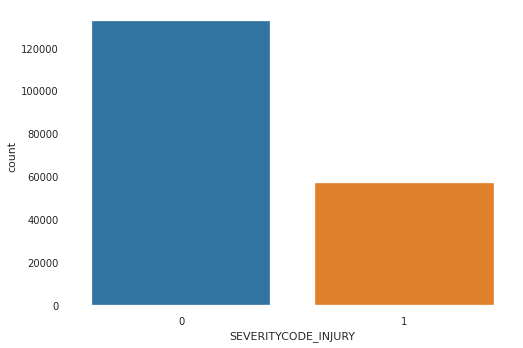

In [348]:
ax = sns.countplot(y,label="Count")
non_injury, injury = y.value_counts()
print('Number of Severity Involving Injury: ',injury)
print('Number of Severity Not Involving Injury : ',non_injury)

In [ ]:
output_filename = 'output/ibm_applied_ds_capstone_profiling_final.html'
profile = ProfileReport(df, title='Data Profiling of Collisions Data FINAL', explorative=True)
profile.to_file(output_file=output_filename)

Kindly open the weblink below for the profiling information<br>
<a href="https://zyron92.github.io/coursera/ibm_applied_ds_capstone_profiling_final.html">Final Data Profiling</a>

# Model Training, Prediction & Results

In [393]:
h2o.shutdown()

/home2/azizi/pyvenv/ds1/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Deprecated, use ``h2o.cluster().shutdown()``.
  """Entry point for launching an IPython kernel.


H2O session _sid_a775 closed.


In [394]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_265"; OpenJDK Runtime Environment (build 1.8.0_265-8u265-b01-0ubuntu2~18.04-b01); OpenJDK 64-Bit Server VM (build 25.265-b01, mixed mode)
  Starting server from /home2/azizi/pyvenv/ds1/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpw57ndoc1
  JVM stdout: /tmp/tmpw57ndoc1/h2o_azizi_started_from_python.out
  JVM stderr: /tmp/tmpw57ndoc1/h2o_azizi_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Kuala_Lumpur
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.1
H2O_cluster_version_age:,24 days
H2O_cluster_name:,H2O_from_python_azizi_dftm4w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,13.89 Gb
H2O_cluster_total_cores:,36
H2O_cluster_allowed_cores:,36
H2O_cluster_status:,"accepting new members, healthy"


In [395]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [396]:
cols_num = ['SDOT_COLCODE','HITPARKEDCAR_ENC','PEDROWNOTGRNT_ENC','SPEEDING_ENC','UNDERINFL_ENC','SEVERITYCODE_INJURY','isWeekend','isNight']
for col in cols_num :
    h2o_df[col] = h2o_df[col].asfactor()

In [397]:
h2o_df.describe()

Rows:189588
Cols:18




,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,INATTENTIONIND_ENC,HITPARKEDCAR_ENC,PEDROWNOTGRNT_ENC,SPEEDING_ENC,UNDERINFL_ENC,SEVERITYCODE_INJURY,isWeekend,isNight
type,enum,int,int,int,int,enum,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum
mins,,0.0,0.0,0.0,1.0,,,,,,0.0,,,,,,,
mean,,2.460060763339465,0.03770280819461147,0.02801865096947062,1.9722978247568423,,,,,,0.15711964892292762,,,,,,,
maxs,,81.0,6.0,2.0,12.0,,,,,,1.0,,,,,,,
sigma,,1.3551092025381661,0.1996703323879078,0.16595082995699684,0.5543389597692029,,,,,,0.36391450009554144,,,,,,,
zeros,,5536,182730,184305,0,,,,,,159800,,,,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,Angles,2.0,0.0,0.0,2.0,At Intersection (intersection related),11,Overcast,Wet,Daylight,0.0,0,0,0,0,1,0,0
1,Sideswipe,2.0,0.0,0.0,2.0,Mid-Block (not related to intersection),16,Raining,Wet,Dark - Street Lights On,0.0,0,0,0,0,0,0,1
2,Parked Car,4.0,0.0,0.0,3.0,Mid-Block (not related to intersection),14,Overcast,Dry,Daylight,0.0,0,0,0,0,0,0,0


In [398]:
train, test = h2o_df.split_frame(ratios=[.70])

# Identify predictors and response
x = train.columns
y = "SEVERITYCODE_INJURY"
x.remove(y)

In [399]:
aml = H2OAutoML(max_runtime_secs=600,
                exclude_algos=['DeepLearning'],
                seed=1,
                balance_classes=True,
                nfolds=5,
                project_name='Completed'
)
%time aml.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 59s, sys: 436 ms, total: 2min
Wall time: 7min 3s


In [403]:
lb = aml.leaderboard
lb.head(rows=10)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_AutoML_20200903_203339,0.804365,0.47488,0.645334,0.279253,0.396746,0.157407
StackedEnsemble_BestOfFamily_AutoML_20200903_203339,0.804048,0.475144,0.644897,0.279192,0.396852,0.157492
GBM_grid__1_AutoML_20200903_203339_model_9,0.80371,0.468319,0.644527,0.279049,0.395708,0.156585
GBM_grid__1_AutoML_20200903_203339_model_3,0.803666,0.468211,0.644678,0.279621,0.395691,0.156571
GBM_2_AutoML_20200903_203339,0.803657,0.468246,0.644045,0.279613,0.395678,0.156561
XGBoost_3_AutoML_20200903_203339,0.803577,0.467994,0.644261,0.279822,0.39564,0.156531
GBM_1_AutoML_20200903_203339,0.803518,0.468503,0.644202,0.279767,0.395763,0.156628
XGBoost_grid__1_AutoML_20200903_203339_model_7,0.8034,0.468211,0.644409,0.279846,0.395708,0.156585
GBM_3_AutoML_20200903_203339,0.803369,0.468656,0.64335,0.279969,0.395849,0.156696
XGBoost_grid__1_AutoML_20200903_203339_model_2,0.803295,0.468315,0.644855,0.280122,0.395766,0.15663


In [404]:
model = h2o.get_model('StackedEnsemble_AllModels_AutoML_20200903_203339')
model.model_performance(test)


ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.15739187478933359
RMSE: 0.39672644831084
LogLoss: 0.47465206831907275
Null degrees of freedom: 56931
Residual degrees of freedom: 56916
Null deviance: 69499.01435493777
Residual deviance: 54045.78310708288
AIC: 54077.78310708288
AUC: 0.8026484891773773
AUCPR: 0.6453493489311062
Gini: 0.6052969783547546

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.24861837387201838: 


,,0,1,Error,Rate
0,0,24367.0,15519.0,0.3891,(15519.0/39886.0)
1,1,2996.0,14050.0,0.1758,(2996.0/17046.0)
2,Total,27363.0,29569.0,0.3252,(18515.0/56932.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.248618,0.602810,270.0
1,max f2,0.122424,0.751970,344.0
2,max f0point5,0.496561,0.584121,142.0
3,max accuracy,0.532300,0.760223,126.0
4,max precision,0.934696,0.954545,0.0
5,max recall,0.055488,1.000000,397.0
6,max specificity,0.934696,0.999950,0.0
7,max absolute_mcc,0.238622,0.398934,275.0
8,max min_per_class_accuracy,0.316180,0.706911,232.0
9,max mean_per_class_accuracy,0.248618,0.717578,270.0



Gains/Lift Table: Avg response rate: 29.94 %, avg score: 29.87 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010240,0.925937,3.087836,3.087836,0.924528,0.929214,0.924528,0.929214,0.031620,0.031620,208.783558,208.783558,0.030517
1,2,0.020077,0.923690,3.005913,3.047699,0.900000,0.924616,0.912511,0.926961,0.029567,0.061187,200.591341,204.769873,0.058680
2,3,0.030124,0.921812,2.983725,3.026362,0.893357,0.922717,0.906122,0.925546,0.029978,0.091165,198.372524,202.636180,0.087129
3,4,0.040013,0.918513,3.019558,3.024680,0.904085,0.920461,0.905619,0.924289,0.029860,0.121025,201.955778,202.468021,0.115635
4,5,0.050007,0.910371,2.964238,3.012600,0.887522,0.915022,0.902002,0.922437,0.029626,0.150651,196.423799,201.260026,0.143656
5,6,0.100014,0.601797,2.273528,2.643064,0.680717,0.731276,0.791359,0.826857,0.113692,0.264344,127.352776,164.306401,0.234559
6,7,0.150689,0.520450,1.704103,2.327304,0.510225,0.549626,0.696818,0.733628,0.086355,0.350698,70.410342,132.730445,0.285487
7,8,0.206422,0.470470,1.591533,2.128649,0.476521,0.489219,0.637338,0.667638,0.088701,0.439399,59.153310,112.864869,0.332545
8,9,0.300007,0.361832,1.440522,1.913992,0.431306,0.419688,0.573068,0.590292,0.134812,0.574211,44.052157,91.399170,0.391390
9,10,0.401865,0.320520,1.196237,1.732067,0.358165,0.331934,0.518598,0.524807,0.121847,0.696058,19.623731,73.206689,0.419921


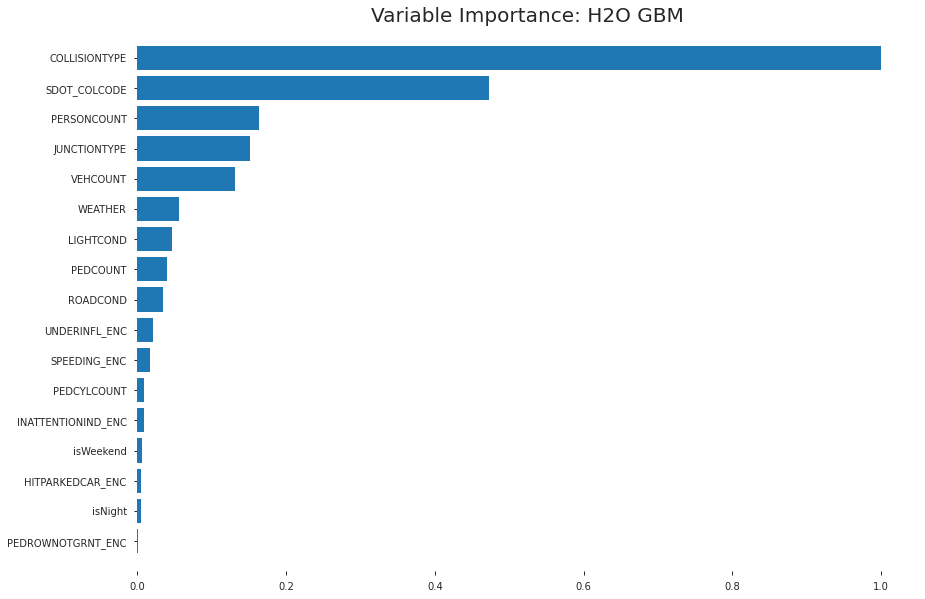

In [407]:
model = h2o.get_model('GBM_grid__1_AutoML_20200903_203339_model_9')
model.varimp_plot(num_of_features=20)